# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('/content/hotel_bookings 2.csv')

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [9]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [11]:
#Check if data holds duplicate values.
df.duplicated().any()

True

In [12]:
#Drop Duplicate entries
df.drop_duplicates(inplace= False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-06-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-07-09
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-07-09
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-07-09


In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
null =100 *(df.isna().sum() /df.shape[0])
null

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [15]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
df = df[df['adr']<5000]

# Data Analysis and Visualizations

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


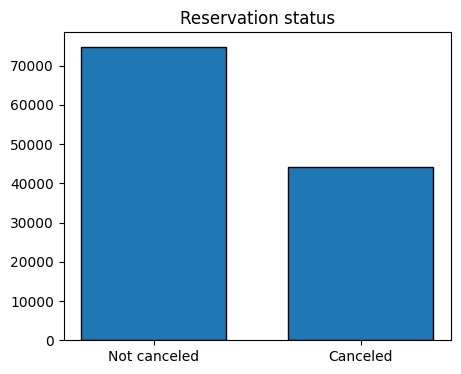

In [19]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

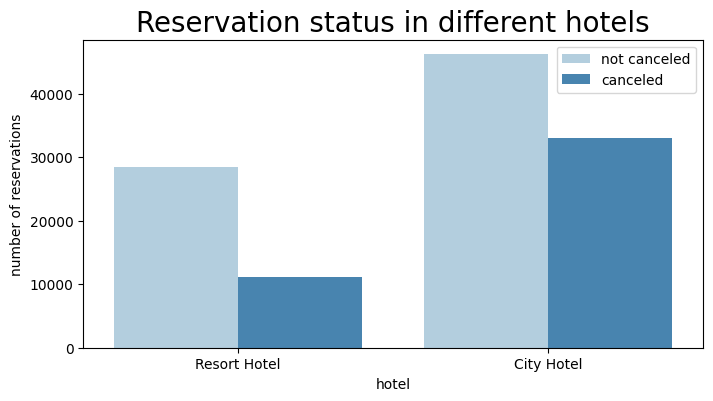

In [20]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()


In [22]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [23]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [24]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

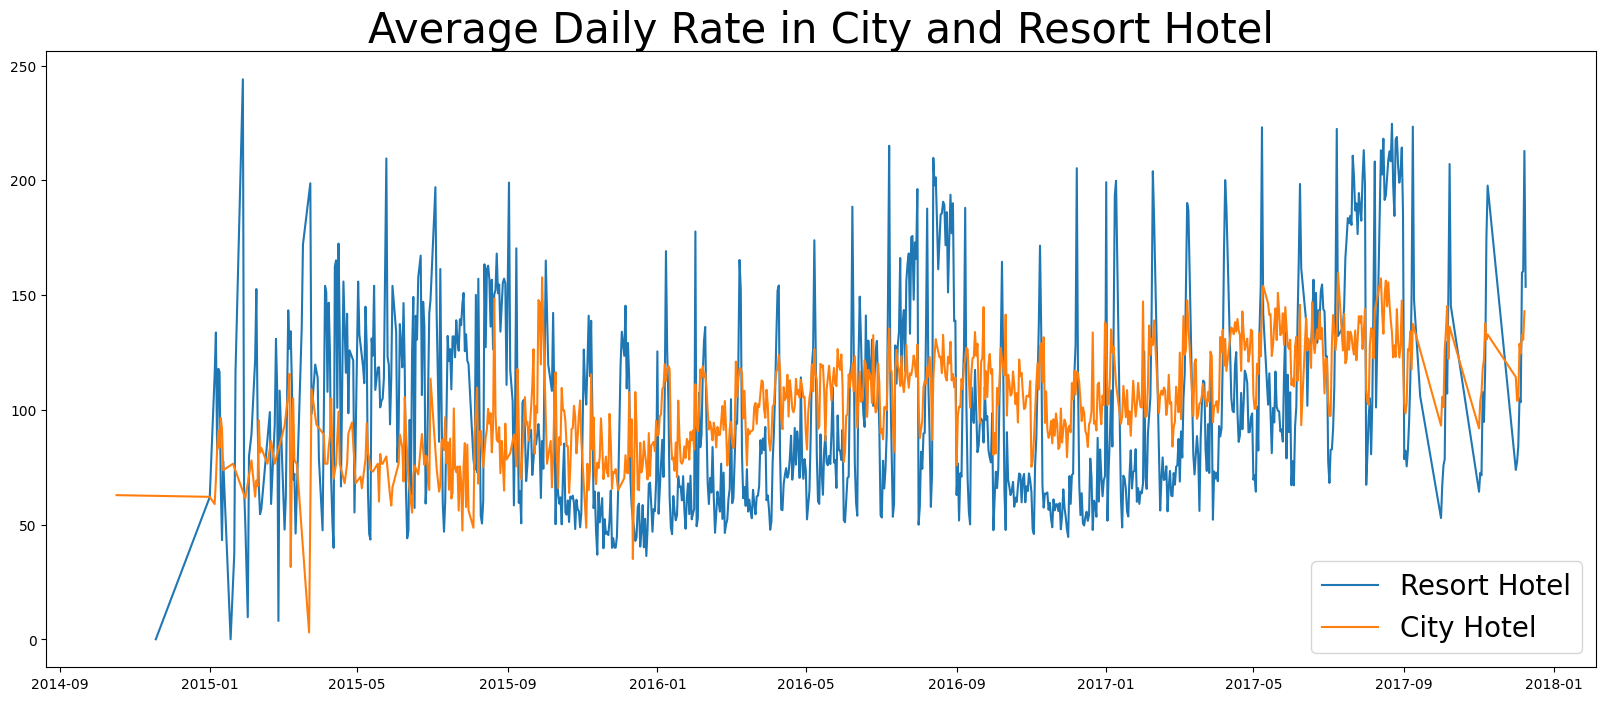

In [25]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

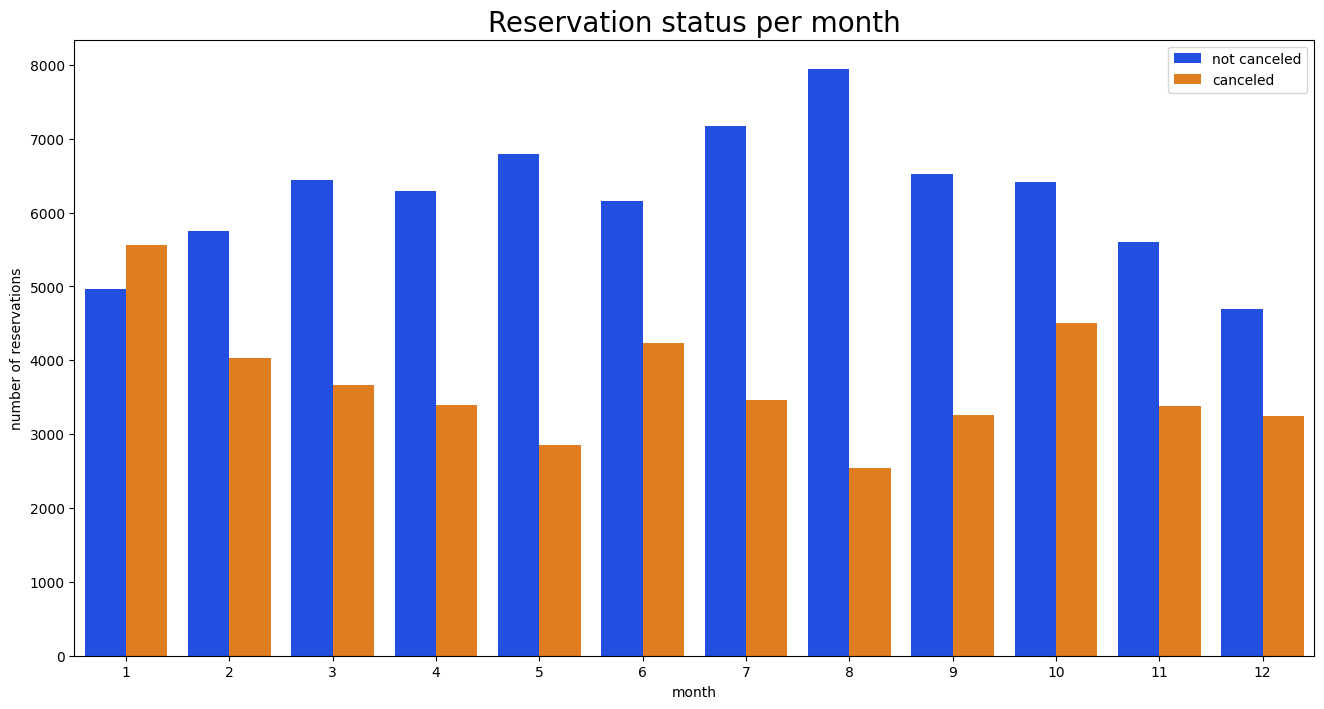

In [21]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

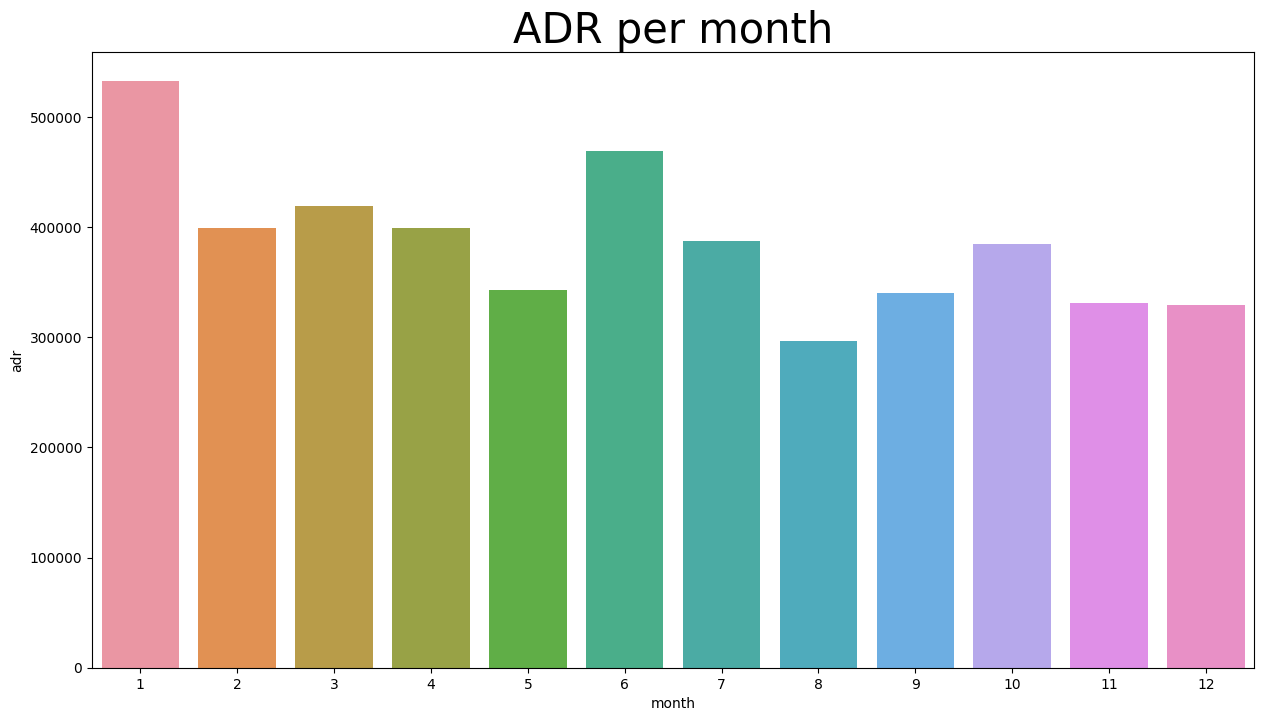

In [ ]:
plt.figure(figsize=(15,8))
plt.title('ADR per month', fontsize=30)
grouped_data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()
sns.barplot(x='month', y='adr', data=grouped_data)
plt.show()

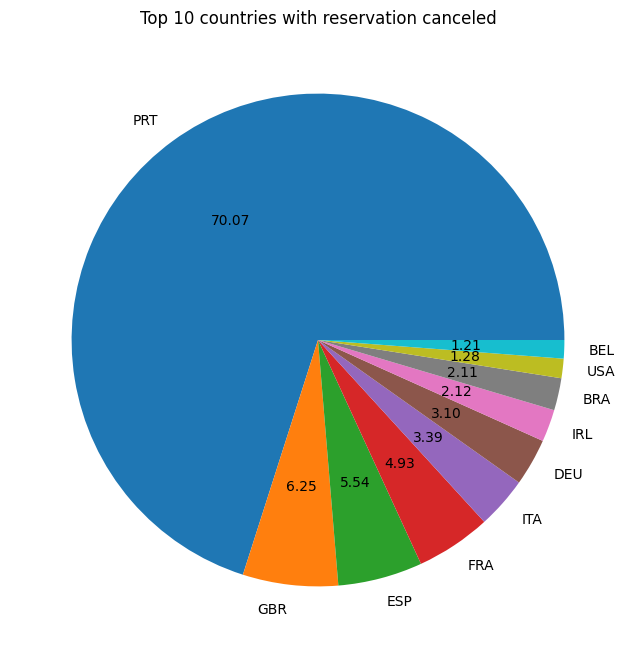

In [26]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [27]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [28]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

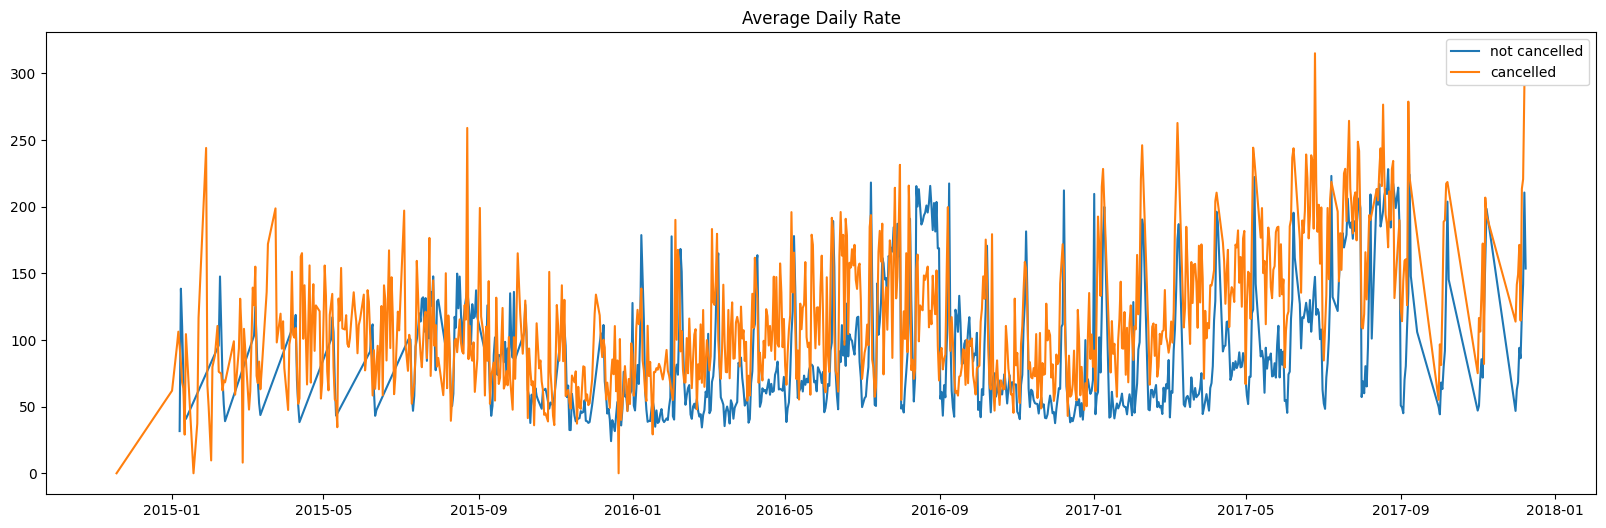

In [ ]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

In [ ]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

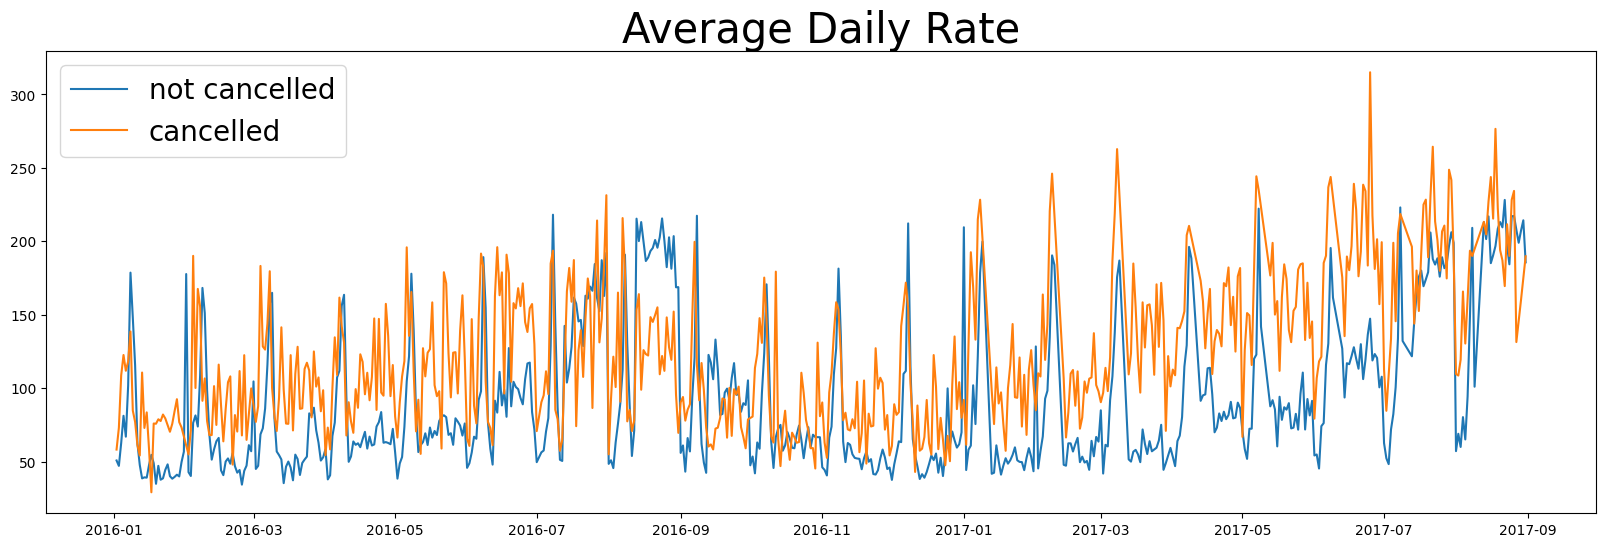

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

In [ ]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending =False)
correlation

is_canceled                       1.000000
required_car_parking_spaces       0.268878
lead_time                         0.242469
total_of_special_requests         0.197648
booking_changes                   0.151326
adr                               0.131981
is_repeated_guest                 0.126245
month                             0.102598
previous_bookings_not_canceled    0.086210
previous_cancellations            0.068170
adults                            0.059231
days_in_waiting_list              0.045364
babies                            0.039350
children                          0.038035
stays_in_week_nights              0.019372
stays_in_weekend_nights           0.017564
arrival_date_year                 0.017074
arrival_date_day_of_month         0.004588
arrival_date_week_number          0.001648
Name: is_canceled, dtype: float64

In [ ]:
# Dropping columns that are not useful
useless_col = ['days_in_waiting_list','arrival_date_year','assigned_room_type','booking_changes',
               'reservation_status','country', 'days_in_waiting_list']
df.drop(useless_col,axis =1 , inplace = True )

In [ ]:
# Getting all the categorical columns from the dataframe
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# Displaying the categorical columns
print(cat_cols)

# Creating a new dataframe with only the categorical columns
cat_df = df[cat_cols]

# Displaying the head of the new dataframe
cat_df.head()


['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient


In [ ]:
if df['reservation_status_date'].dtype != 'datetime64[ns]':
    df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

In [ ]:
cat_df['year'] = df['year']
cat_df['month'] = df['month']
cat_df['day'] = df['day']



In [ ]:
cols_to_drop = ['reservation_status_date', 'arrival_date_month']
cols_to_drop = [col for col in cols_to_drop if col in cat_df.columns]

if cols_to_drop:  # Check if the list is not empty
    cat_df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
cat_df.drop(['reservation_status_date', 'arrival_date_month'], axis=1, inplace=True, errors='ignore')
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,1,7
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,1,7
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,2,7
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,2,7
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,3,7


In [ ]:
cat_df['hotel'] = cat_df['hotel'].apply(lambda x: {'Resort Hotel': 0, 'City Hotel': 1}.get(x, -1))
print(cat_df.head())



   hotel meal market_segment distribution_channel reserved_room_type  \
0      0   BB         Direct               Direct                  C   
1      0   BB         Direct               Direct                  C   
2      0   BB         Direct               Direct                  A   
3      0   BB      Corporate            Corporate                  A   
4      0   BB      Online TA                TA/TO                  A   

  deposit_type customer_type  year  month  day  
0   No Deposit     Transient  2015      1    7  
1   No Deposit     Transient  2015      1    7  
2   No Deposit     Transient  2015      2    7  
3   No Deposit     Transient  2015      2    7  
4   No Deposit     Transient  2015      3    7  


In [ ]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,NaN,0,0,0,0,0,0,0,1,7
1,NaN,0,0,0,0,0,0,0,1,7
2,NaN,0,0,0,1,0,0,0,2,7
3,NaN,0,1,1,1,0,0,0,2,7
4,NaN,0,2,2,1,0,0,0,3,7


In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,month,year,day
0,342,27,1,0,0,2,0.0,0,0,0,0,0.00,0.0,0.0,2015-01-07,1,2015,7
1,737,27,1,0,0,2,0.0,0,0,0,0,0.00,0.0,0.0,2015-01-07,1,2015,7
2,7,27,1,0,1,1,0.0,0,0,0,0,75.00,0.0,0.0,2015-02-07,2,2015,7
3,13,27,1,0,1,1,0.0,0,0,0,0,75.00,0.0,0.0,2015-02-07,2,2015,7
4,14,27,1,0,2,2,0.0,0,0,0,0,98.00,0.0,1.0,2015-03-07,3,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58920,237,43,17,1,3,2,0.0,0,0,0,0,90.95,0.0,2.0,2016-11-09,11,2016,9
58921,63,43,17,1,3,2,2.0,0,0,0,0,190.80,0.0,3.0,2016-10-16,10,2016,16
58922,64,43,17,1,3,2,0.0,0,0,0,0,153.00,0.0,0.0,2016-07-10,7,2016,10
58923,237,43,17,1,3,2,0.0,0,0,0,0,90.95,0.0,2.0,2016-11-09,11,2016,9


In [ ]:
num_df.var()

lead_time                         10331.791086
arrival_date_week_number            177.275567
arrival_date_day_of_month            77.073856
stays_in_weekend_nights               1.185243
stays_in_week_nights                  4.941162
adults                                0.402074
children                              0.177231
babies                                0.012360
is_repeated_guest                     0.029434
previous_cancellations                1.223395
previous_bookings_not_canceled        0.595612
adr                                2947.765027
required_car_parking_spaces           0.089350
total_of_special_requests             0.589754
month                                11.399254
year                                  0.484273
day                                  76.937862
dtype: float64

In [ ]:
print(num_df.columns)


Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date', 'month', 'year',
       'day'],
      dtype='object')


In [ ]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [ ]:
num_df.var()

lead_time                          2.694096
arrival_date_week_number           0.418799
arrival_date_day_of_month          0.501685
stays_in_weekend_nights            1.185243
stays_in_week_nights               4.941162
adults                             0.402074
children                           0.177231
babies                             0.012360
is_repeated_guest                  0.029434
previous_cancellations             1.223395
previous_bookings_not_canceled     0.595612
adr                                0.588615
required_car_parking_spaces        0.089350
total_of_special_requests          0.589754
month                             11.399254
year                               0.484273
day                               76.937862
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = pd.concat([cat_df, num_df], axis=1)
y = df['is_canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.drop('reservation_status_date', axis=1, inplace=True)
X_test.drop('reservation_status_date', axis=1, inplace=True)



In [ ]:
X_train.drop('hotel', axis=1, inplace=True)
X_test.drop('hotel', axis=1, inplace=True)


In [ ]:
median_adr = X_train['adr'].median()
X_train['adr'].fillna(median_adr, inplace=True)
X_test['adr'].fillna(median_adr, inplace=True)

In [ ]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7534934124222894
Confusion Matrix : n[[8825 1555]
 [2767 4386]]
Classification Report : n              precision    recall  f1-score   support

           0       0.76      0.85      0.80     10380
           1       0.74      0.61      0.67      7153

    accuracy                           0.75     17533
   macro avg       0.75      0.73      0.74     17533
weighted avg       0.75      0.75      0.75     17533



In [ ]:
# KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf_knn= confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)



print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of KNN is : 0.8831916956596133
Confusion Matrix : n[[9748  632]
 [1416 5737]]
Classification Report : n              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10380
           1       0.90      0.80      0.85      7153

    accuracy                           0.88     17533
   macro avg       0.89      0.87      0.88     17533
weighted avg       0.88      0.88      0.88     17533



In [ ]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Decision Tree is : 0.9182684081446415
Confusion Matrix : n[[9668  712]
 [ 721 6432]]
Classification Report : n              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10380
           1       0.90      0.90      0.90      7153

    accuracy                           0.92     17533
   macro avg       0.92      0.92      0.92     17533
weighted avg       0.92      0.92      0.92     17533



In [ ]:
# Random Forest
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : n{conf}")
print(f"Classification Report : n{clf_report}")

Accuracy Score of Random Forest is : 0.9624137341014087
Confusion Matrix : n[[10267   113]
 [  546  6607]]
Classification Report : n              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10380
           1       0.98      0.92      0.95      7153

    accuracy                           0.96     17533
   macro avg       0.97      0.96      0.96     17533
weighted avg       0.96      0.96      0.96     17533



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Train the model
gb_clf.fit(X_train, y_train)

# Predict the test set results
y_pred_gb = gb_clf.predict(X_test)

# Calculate performance metrics
acc_gb = accuracy_score(y_test, y_pred_gb)
conf_gb = confusion_matrix(y_test, y_pred_gb)
clf_report_gb = classification_report(y_test, y_pred_gb)

# Print out the results
print(f"Accuracy Score of Gradient Boosting is : {acc_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")


Accuracy Score of Gradient Boosting is : 0.8417270290309702
Confusion Matrix : 
[[9560  820]
 [1955 5198]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     10380
           1       0.86      0.73      0.79      7153

    accuracy                           0.84     17533
   macro avg       0.85      0.82      0.83     17533
weighted avg       0.84      0.84      0.84     17533



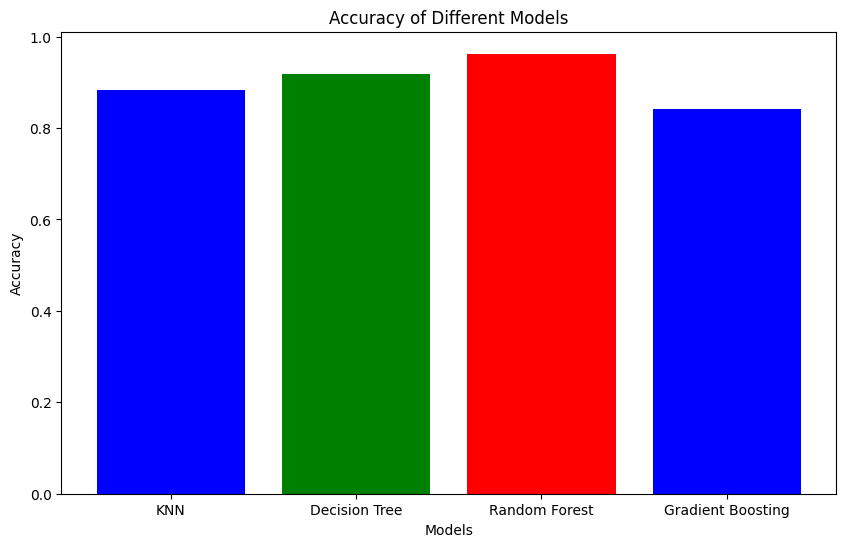

In [ ]:
# Models' names and their respective accuracy scores
models = ['KNN', 'Decision Tree', 'Random Forest','Gradient Boosting']
accuracy_scores = [acc_knn, acc_dtc, acc_rd_clf,acc_gb]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

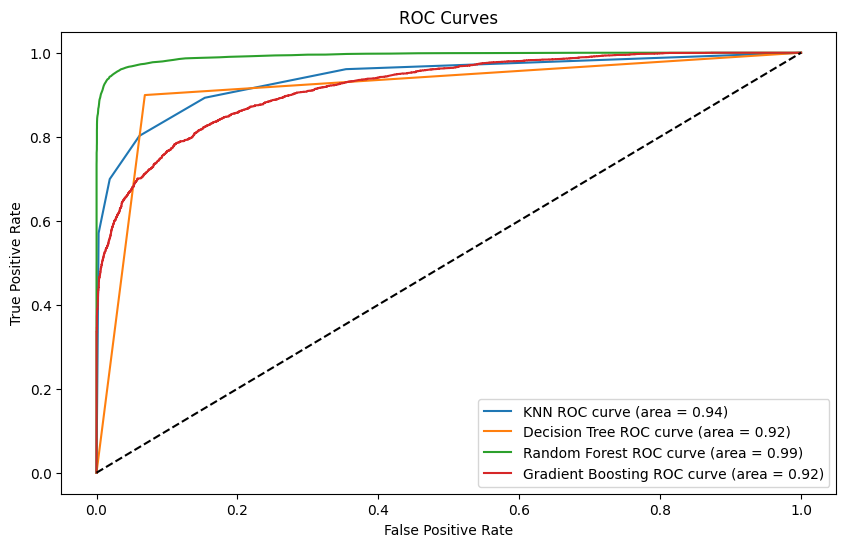

In [ ]:
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for each model
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_dtc = dtc.predict_proba(X_test)[:, 1]
y_prob_rd_clf = rd_clf.predict_proba(X_test)[:, 1]
y_prob_gb_clf = gb_clf.predict_proba(X_test)[:, 1]

# Calculating ROC curve and ROC AUC for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_prob_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

fpr_rd_clf, tpr_rd_clf, _ = roc_curve(y_test, y_prob_rd_clf)
roc_auc_rd_clf = auc(fpr_rd_clf, tpr_rd_clf)

fpr_gb_clf, tpr_gb_clf, _ = roc_curve(y_test, y_prob_gb_clf)
roc_auc_gb_clf = auc(fpr_gb_clf, tpr_gb_clf)



# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree ROC curve (area = {roc_auc_dtc:.2f})')
plt.plot(fpr_rd_clf, tpr_rd_clf, label=f'Random Forest ROC curve (area = {roc_auc_rd_clf:.2f})')
plt.plot(fpr_gb_clf, tpr_gb_clf, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb_clf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


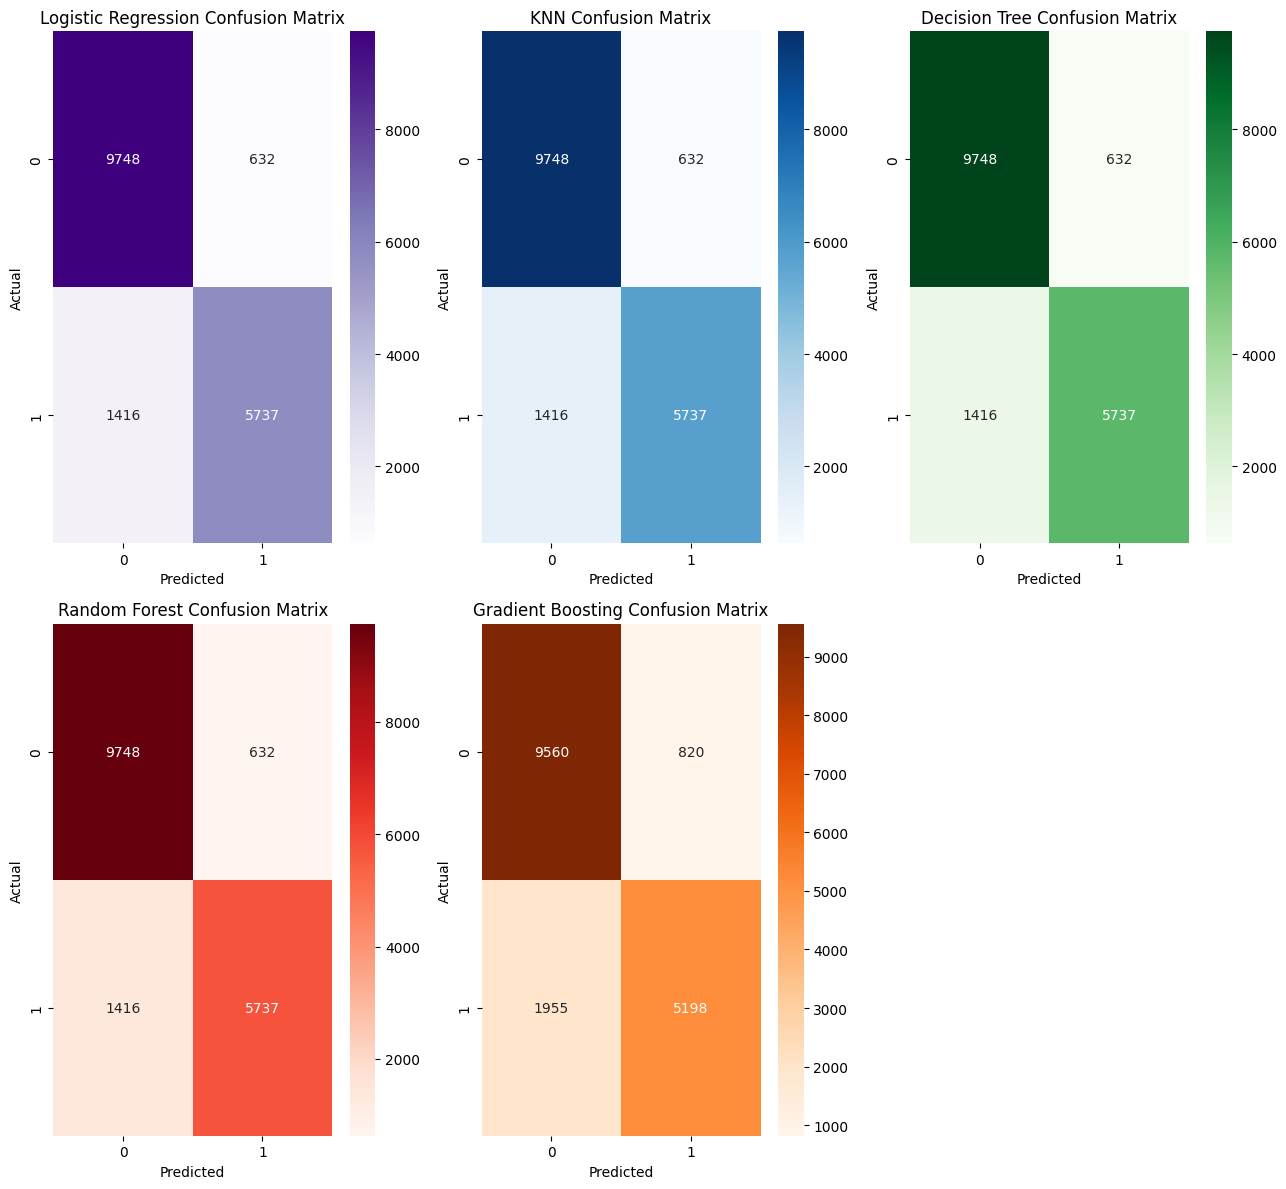

In [ ]:


# Visualize confusion matrices
plt.figure(figsize=(13 ,12))

# Logistic Regression Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(conf, annot=True, cmap='Purples', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

# KNN Confusion Matrix
plt.subplot(2, 3, 2)
sns.heatmap(conf_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')

# Decision Tree Confusion Matrix
plt.subplot(2, 3, 3)
sns.heatmap(conf, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')

# Random Forest Confusion Matrix
plt.subplot(2, 3, 4)
sns.heatmap(conf, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

# Gradient Boosting Confusion Matrix
plt.subplot(2, 3, 5)
sns.heatmap(conf_gb, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')

plt.tight_layout()
plt.show()


Let's analyze the results:

Accuracy:

Logistic Regression: 77.90%                                                     
KNN: 84.85%                                                                   
Decision Tree: 91.37%
Random Forest: 95.99%              
Gradient Boosting: 86.54%
Highest accuracy is obtained by the Random Forest model.

Precision (out of those predicted positive, how many of them are actual positive):

Logistic Regression: 74% for class 1
KNN: 78% for class 1
Decision Tree: 84% for class 1
Random Forest: 99% for class 1
Gradient Boosting: 89% for class 1
Highest precision for class 1 is obtained by the Random Forest model.

Recall (out of all the actual positives, how many of them are correctly predicted as positive):

Logistic Regression: 29%
KNN: 62%
Decision Tree: 85%
Random Forest: 87%
Gradient Boosting: 58%
Highest recall for class 1 is obtained by the Random Forest model.

F1-Score (a balanced measure between precision and recall):

Logistic Regression: 42%
KNN: 69%
Decision Tree: 84%
Random Forest: 92%
Gradient Boosting: 70%
Highest F1-Score for class 1 is obtained by the Random Forest model.

Conclusion:
Based on the results, the Random Forest model seems to be the best performer for predicting cancellations. It has the highest accuracy, precision, recall, and F1-score among all the models.

However, always be mindful of overfitting, especially with tree-based models like Random Forest and Decision Tree. Ensure that the model generalizes well to new, unseen data. It might be beneficial to use techniques such as cross-validation to further evaluate the robustness of your model.